<a href="https://colab.research.google.com/github/RJaqE/Challenge3/blob/main/TelecomX_LATAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom X – Parte 2: Predicción de Cancelación (Churn)**

📣 Historia del Desafío

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

🧰 Lo que vas a practicar

✅ Preprocesamiento de datos para Machine Learning
✅ Construcción y evaluación de modelos predictivos
✅ Interpretación de resultados y entrega de insights
✅ Comunicación técnica con enfoque estratégico

🚀 Ahora eres: Analista Junior de Machine Learning

Telecom X confía en tu entrega para dar los próximos pasos hacia una solución de inteligencia predictiva eficaz. ¡Buena suerte!

#**🛠️ Preparación de los Datos**

##**Extracción del Archivo Tratado**

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [5]:
import pandas as pd

datos =  pd.read_csv('/content/datos__tratados.csv')
datos.shape

(7267, 22)

In [6]:
datos.head()

,clientesID,estadia_empresa,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_telefono,lineas_multiples,proveedor_internet,...,proteccion_adicional,soporte_tecnico,suscripcion_tv,suscripcion_peliculas,contrato,facturacion_electronica,forma_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,0,Mujer,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.156710
1,0003-MKNFE,0,Hombre,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.969313
2,0004-TLHLJ,1,Hombre,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.429586
3,0011-IGKFF,1,Hombre,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.221914
4,0013-EXCHZ,1,Mujer,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.758353


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clientesID               7267 non-null   object 
 1   estadia_empresa          7267 non-null   int64  
 2   genero                   7267 non-null   object 
 3   adulto_mayor             7267 non-null   int64  
 4   pareja                   7267 non-null   int64  
 5   dependientes             7267 non-null   int64  
 6   meses_contrato           7267 non-null   int64  
 7   servicio_telefono        7267 non-null   int64  
 8   lineas_multiples         7267 non-null   int64  
 9   proveedor_internet       7267 non-null   object 
 10  seguridad_linea          7267 non-null   int64  
 11  respaldo_linea           7267 non-null   int64  
 12  proteccion_adicional     7267 non-null   int64  
 13  soporte_tecnico          7267 non-null   int64  
 14  suscripcion_tv          

##**Eliminación de Columnas Irrelevantes**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [8]:
datos = datos_clientes.drop(columns='clientesID', axis = 1)
datos.head()

,estadia_empresa,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_telefono,lineas_multiples,proveedor_internet,seguridad_linea,...,proteccion_adicional,soporte_tecnico,suscripcion_tv,suscripcion_peliculas,contrato,facturacion_electronica,forma_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0,Mujer,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.156710
1,0,Hombre,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.969313
2,1,Hombre,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.429586
3,1,Hombre,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.221914
4,1,Mujer,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.758353


##**Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

🔎 Sugerencia:
Puedes consultar este artículo para entender mejor cuándo usar get_dummies o OneHotEncoder:

In [9]:
datos['genero'] = datos['genero'].replace({'Hombre':0,'Mujer':1})
datos.sample(5)

/tmp/ipython-input-2027712911.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['genero'] = datos['genero'].replace({'Hombre':0,'Mujer':1})


,estadia_empresa,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_telefono,lineas_multiples,proveedor_internet,seguridad_linea,...,proteccion_adicional,soporte_tecnico,suscripcion_tv,suscripcion_peliculas,contrato,facturacion_electronica,forma_pago,gastos_mensuales,gastos_totales,cuentas_diarias
1180,0,0,0,0,0,11,1,0,DSL,0,...,0,0,0,0,Month-to-month,0,Credit card (automatic),45.20,492.00,1.486026
3714,0,0,0,1,1,54,0,0,DSL,0,...,1,1,0,1,Two year,0,Credit card (automatic),46.00,2424.05,1.512327
4410,0,1,0,1,0,16,1,0,No,0,...,0,0,0,0,Month-to-month,0,Mailed check,19.60,314.45,0.644383
5869,0,1,1,0,0,72,1,1,Fiber optic,1,...,1,1,0,1,Two year,1,Bank transfer (automatic),107.40,7748.75,3.530955
1107,1,1,0,0,1,4,1,1,Fiber optic,0,...,1,0,0,0,Month-to-month,0,Bank transfer (automatic),84.05,333.55,2.763285


In [11]:
categoricas = ['proveedor_internet','contrato','forma_pago']
datos_codificado = pd.get_dummies(data = datos, columns = categoricas, dtype = int)
datos_codificado.head()

,estadia_empresa,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_telefono,lineas_multiples,seguridad_linea,respaldo_linea,...,proveedor_internet_DSL,proveedor_internet_Fiber optic,proveedor_internet_No,contrato_Month-to-month,contrato_One year,contrato_Two year,forma_pago_Bank transfer (automatic),forma_pago_Credit card (automatic),forma_pago_Electronic check,forma_pago_Mailed check
0,0,1,0,1,1,9,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,9,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,4,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1,0,1,1,0,13,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,1,1,1,0,3,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


##**Verificación de la Proporción de Cancelación (Churn)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia:
Puedes usar value_counts() de pandas para obtener esta proporción:
Documentación oficial de value_counts()

In [12]:
datos['estadia_empresa'].value_counts()

,count
estadia_empresa,
0,5398
1,1869


##**Balanceo de Clases (opcional)**


Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

🔎 Sugerencia: Puedes leer más sobre cómo manejar el desbalanceo de clases en este artículo: Artículo en Alura sobre desbalanceo de datos

In [13]:
datos_codificado['gastos_totales'] = datos_codificado['gastos_totales'].fillna(datos_codificado['gastos_totales'].median())

X = datos_codificado.drop(columns='estadia_empresa', axis = 1)
y = datos_codificado['estadia_empresa']


from imblearn.over_sampling import SMOTE

sobremuestreador_smote = SMOTE()
X_balanceada, y_balanceada = sobremuestreador_smote.fit_resample(X, y)

y_balanceada.value_counts(normalize = True)

,proportion
estadia_empresa,
0,0.5
1,0.5


##**Normalización o Estandarización (si es necesario)**


Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

🔎 Sugerencia: Puedes leer más sobre normalización y estandarización de datos en este artículo: Artículo en Medium sobre normalización y estandarización en Machine Learning

In [14]:
from sklearn.preprocessing import MinMaxScaler

normalizacion = MinMaxScaler()
display(normalizacion)

MinMaxScaler()

#**🎯 Correlación y Selección de Variables**

##**Análisis de Correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [15]:
correlacion = datos_codificado.corr()
correlacion_estadia = correlacion['estadia_empresa'].sort_values(ascending = False)
display(correlacion_estadia)

,estadia_empresa
estadia_empresa,1.000000
contrato_Month-to-month,0.395584
proveedor_internet_Fiber optic,0.300949
forma_pago_Electronic check,0.294626
cuentas_diarias,0.189866
gastos_mensuales,0.189866
facturacion_electronica,0.186666
adulto_mayor,0.146733
suscripcion_tv,0.062430
suscripcion_peliculas,0.060586


##**Análisis Dirigido**


Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


###Tiempo de contrato × Cancelación



/tmp/ipython-input-707243799.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='estadia_empresa', y='meses_contrato', data=datos_codificado, palette='plasma', width=0.5)


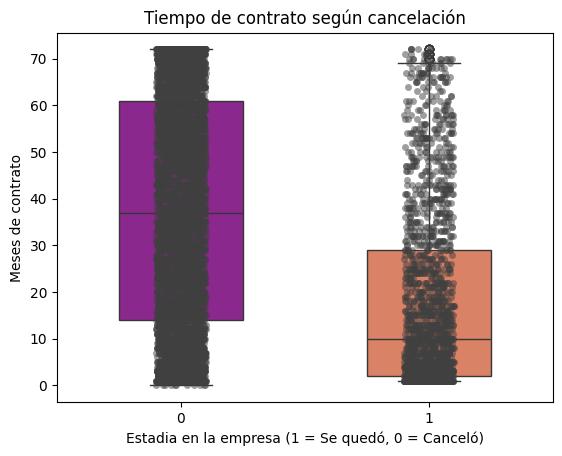

In [18]:
sns.boxplot(x='estadia_empresa', y='meses_contrato', data=datos_codificado, palette='plasma', width=0.5)
sns.stripplot(x='estadia_empresa', y='meses_contrato', data=datos_codificado, color=".25", alpha=0.5)
plt.title('Tiempo de contrato según cancelación')
plt.xlabel('Estadia en la empresa (1 = Se quedó, 0 = Canceló)')
plt.ylabel('Meses de contrato')
plt.show()

###Gasto total × Cancelación

/tmp/ipython-input-16896566.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='estadia_empresa', y='gastos_totales', data=datos_codificado, palette='viridis', width=0.5)


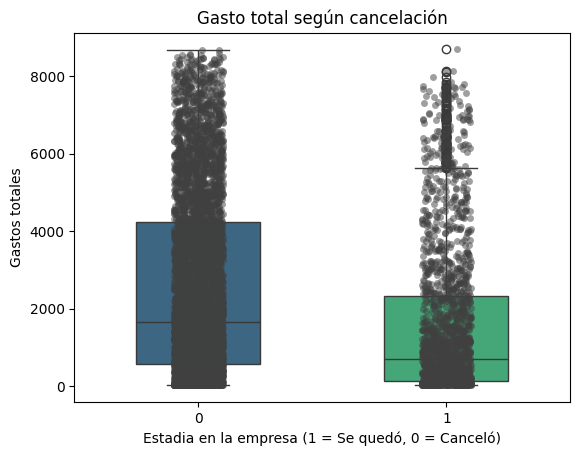

In [19]:
sns.boxplot(x='estadia_empresa', y='gastos_totales', data=datos_codificado, palette='viridis', width=0.5)
sns.stripplot(x='estadia_empresa', y='gastos_totales', data=datos_codificado, color=".25", alpha=0.5)
plt.title('Gasto total según cancelación')
plt.xlabel('Estadia en la empresa (1 = Se quedó, 0 = Canceló)')
plt.ylabel('Gastos totales')
plt.show()

#**🤖 Modelado Predictivo**

##**Separación de Datos**


Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [21]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train, y_train)

DummyRegressor()

##**Creación de Modelos**

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [23]:
# Normalización

X_entrenamiento_normalizado = normalizacion.fit_transform(X_train)

In [24]:
# Modelo bosques aleatorios

from sklearn.ensemble import RandomForestClassifier

modelo_bosques = RandomForestClassifier(max_depth = 5, random_state=45)
modelo_bosques.fit(X_train, y_train)

modelo_bosques.score(X_test, y_test)

0.7909215955983494

In [25]:
# Modelo Árbol de decisión

from sklearn.tree import DecisionTreeClassifier

X, X_test2, y, y_test2 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=45)
X_train2, X_val, y_train2, y_val = train_test_split(X, y, stratify=y, random_state=45)

modelo_arbol = DecisionTreeClassifier(max_depth=10)
modelo_arbol.fit(X_train, y_train)
modelo_arbol.score(X_val, y_val)

0.8459119496855346

##**Evaluación de los Modelos**


Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as ConfusionMatrixDisplay

In [27]:
from sklearn.metrics import mean_absolute_error # Error absoluto medio
from sklearn.metrics import mean_squared_error # Raiz cuadrada del error
from sklearn.metrics import r2_score # Coeficiente de determinación

y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test, y_pred):
  rmse = mean_squared_error(y_test, y_pred, squared=False) # Usar squared=False para RMSE
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  metricas = {'RMSE':round(rmse, 4),
              'MAE':round(mae, 4),
              'R2':round(r2, 4)}

  return metricas

In [28]:
def calcular_metricas (y_test, y_pred):
  exactitud = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, zero_division=0)
  recall = recall_score(y_test, y_pred, zero_division=0)
  f1 = f1_score(y_test, y_pred, zero_division=0)
  matriz = confusion_matrix(y_test, y_pred)

  metricas = {'Exactitud': exactitud,
              'Precisión': precision,
              'Recall': recall,
              'F1-score': f1}
  return metricas


In [29]:
# Modelo bosques aleatorios

y_pred = modelo_bosques.predict(X_test)
metricas_bosques = calcular_metricas(y_test, y_pred)
print(metricas_bosques)

{'Exactitud': 0.7909215955983494, 'Precisión': 0.6484149855907781, 'Recall': 0.40250447227191416, 'F1-score': 0.4966887417218543}


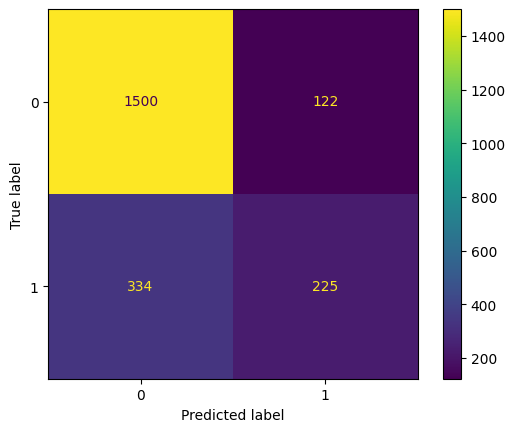

In [30]:
matriz_confusion = confusion_matrix(y_test, y_pred)
visualizacion_matriz = ConfusionMatrixDisplay.ConfusionMatrixDisplay(matriz_confusion)
visualizacion_matriz.plot();

In [31]:
# Modelo árbol

y_val_pred = modelo_arbol.predict(X_val)
calcular_metricas (y_val, y_val_pred)

{'Exactitud': 0.8459119496855346,
 'Precisión': 0.707936507936508,
 'Recall': 0.6819571865443425,
 'F1-score': 0.6947040498442367}

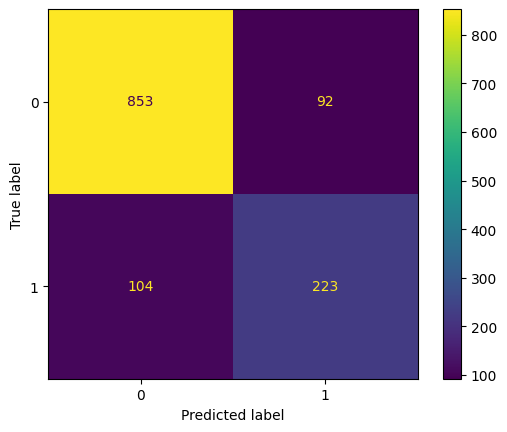

In [32]:
y_val_pred = modelo_arbol.predict(X_val)

matriz_confusion_arbol = confusion_matrix(y_val, y_val_pred)
visualizacion_matriz_arbol = ConfusionMatrixDisplay.ConfusionMatrixDisplay(matriz_confusion_arbol)
visualizacion_matriz_arbol.plot();

Matriz de Confusión (Random Forest Optimizado):

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

# Modelo base
modelo_bosques = RandomForestClassifier(random_state=45)

# Grid balanceado para Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

# Validación cruzada ligera
estrategia_cv = KFold(n_splits=3, shuffle=True, random_state=21)

# GridSearchCV con paralelización
busqueda_rejilla_rf = GridSearchCV(
    estimator=modelo_bosques,
    param_grid=param_grid,
    cv=estrategia_cv,
    scoring='f1',
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ajustar GridSearch
busqueda_rejilla_rf.fit(X_train, y_train)

# Modelo final con los mejores hiperparámetros
modelo_bosques_final = busqueda_rejilla_rf.best_estimator_

# Matriz de confusión
print("Matriz de confusión del Random Forest Optimizado:")
print(confusion_matrix(y_test, modelo_bosques_final.predict(X_test)))


Matriz de confusión del Random Forest Optimizado:
[[1471  151]
 [ 292  267]]


Matriz de Confusión (Árbol de Decisión Optimizado):

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold

# Modelo base
modelo_arbol = DecisionTreeClassifier(random_state=21)

# Grid balanceado: más opciones pero aún razonable para Colab
param_grid = {
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

# Validación cruzada
configuracion_validacion_cruzada = KFold(n_splits=3, shuffle=True, random_state=21)

# GridSearchCV con paralelización
optimizador_hiperparametros_arbol = GridSearchCV(
    estimator=modelo_arbol,
    param_grid=param_grid,
    scoring='f1',
    cv=configuracion_validacion_cruzada,
    n_jobs=-1   # Usa todos los núcleos disponibles
)

# Ajustar el GridSearch
optimizador_hiperparametros_arbol.fit(X_train2, y_train2)

# Modelo final con los mejores hiperparámetros
best_params_arbol = optimizador_hiperparametros_arbol.best_params_
modelo_arbol_final = DecisionTreeClassifier(
    max_depth=best_params_arbol['max_depth'],
    min_samples_leaf=best_params_arbol['min_samples_leaf'],
    min_samples_split=best_params_arbol['min_samples_split'],
    random_state=21
)

modelo_arbol_final.fit(X_train2, y_train2)

# Matriz de confusión
print("Matriz de confusión del Árbol de Decisión Optimizado:")
print(confusion_matrix(y_test2, modelo_arbol_final.predict(X_test2)))


Matriz de confusión del Árbol de Decisión Optimizado:
[[1380  240]
 [ 251  310]]


Observaciones

Random Forest logra más precisión en la clasificación de clientes que no cancelan (mayor número de verdaderos negativos y menos falsos positivos).

Árbol de Decisión identifica ligeramente mejor a los clientes que sí cancelan (mayor número de verdaderos positivos), pero a costa de más falsos positivos.

En general, Random Forest es más robusto y equilibrado, mostrando menor error global y mejor capacidad de generalización.

Conclusión

Para este dataset, el Random Forest Optimizado es el modelo más recomendable si se prioriza la precisión global y la estabilidad, mientras que el Árbol de Decisión puede ser útil para identificar específicamente clientes con alta probabilidad de cancelación, aunque con mayor riesgo de clasificaciones erróneas.

In [36]:
def calcular_metricas (y_test, y_pred):
  exactitud = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, zero_division=0) # Added zero_division
  recall = recall_score(y_test, y_pred, zero_division=0) # Added zero_division
  f1 = f1_score(y_test, y_pred, zero_division=0) # Added zero_division

  metricas = {'Exactitud':round(exactitud, 2),
              'Precisión':round(precision, 2),
              'Recall':round(recall, 2), # Changed 'recall' to 'Recall' for consistency
              'F1':round(f1, 2)
              }
  # Removed print statements
  return metricas # Added return statement

In [37]:
# Modelo bosques

from sklearn.model_selection import cross_validate
# Fit the model before accessing feature_importances_
modelo_bosques.fit(X_train, y_train)
importancia_vars = modelo_bosques.feature_importances_
importancia_caracteristicas = pd.DataFrame({'Features':X.columns, 'Importances':(importancia_vars*100).round(2)}).sort_values('Importances', ascending = False)
importancia_caracteristicas


,Features,Importances
15,gastos_totales,15.41
4,meses_contrato,14.27
14,gastos_mensuales,13.36
16,cuentas_diarias,13.23
20,contrato_Month-to-month,6.01
18,proveedor_internet_Fiber optic,3.74
25,forma_pago_Electronic check,2.95
0,genero,2.49
13,facturacion_electronica,2.35
22,contrato_Two year,2.17


In [40]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

resultados = pd.DataFrame(index =['Exactitud', 'Precision', 'Recall', 'F1-score'])
modelo_caracteristicas = RandomForestClassifier(max_depth = 5, random_state=45)
ct_features = [ i if i != 0 else 1 for i in range (0,30,2)]

# Define and fit the model to get feature importances
modelo_bosques_importancia = RandomForestClassifier(max_depth = 5, random_state=45)
modelo_bosques_importancia.fit(X_train, y_train)
importancia_vars = modelo_bosques_importancia.feature_importances_
importancias_caracteristicas = pd.DataFrame({'Features':X.columns, 'Importances':(importancia_vars*100).round(2)}).sort_values('Importances', ascending = False)


for i in ct_features:
  caracteristicas_seleccionadas = importancias_caracteristicas['Features'].values[:i]
  X_entrenamiento_sel = X_train[caracteristicas_seleccionadas]
  X_prueba_sel = X_test[caracteristicas_seleccionadas]
  modelo_caracteristicas.fit(X_entrenamiento_sel, y_train)
  y_pred = modelo_caracteristicas.predict(X_prueba_sel)

  metricas = calcular_metricas(y_test, y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,2,4,6,8,10,12,14,16,18,20,22,24,26,28
Exactitud,0.74,0.76,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79
Precision,0.00,0.57,0.64,0.64,0.63,0.64,0.65,0.64,0.64,0.64,0.65,0.65,0.66,0.65,0.64
Recall,0.00,0.30,0.39,0.41,0.42,0.42,0.40,0.42,0.41,0.41,0.40,0.40,0.39,0.40,0.40
F1-score,0.00,0.39,0.48,0.50,0.50,0.51,0.50,0.51,0.50,0.50,0.50,0.49,0.49,0.50,0.49


In [41]:
caracteristicas_seleccionadas_final = importancias_caracteristicas['Features'].values[:14]
X_train_final = X_train[caracteristicas_seleccionadas_final]
X_test_final = X_test[caracteristicas_seleccionadas_final]

print("Forma de X_train_final:", X_train_final.shape)
print("Forma de X_test_final:", X_test_final.shape)

Forma de X_train_final: (5086, 14)
Forma de X_test_final: (2181, 14)


In [43]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

# Modelo base
modelo_bosques = RandomForestClassifier(random_state=45)

# Grid ligero para acelerar ejecución
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']  # Solo una opción para reducir combinaciones
}

# Validación cruzada ligera
estrategia_cv = KFold(n_splits=3, shuffle=True, random_state=45)

# GridSearchCV con paralelización
busqueda_rejilla_rf = GridSearchCV(
    estimator=modelo_bosques,
    param_grid=param_grid,
    cv=estrategia_cv,
    scoring='f1',
    n_jobs=-1  # Usa todos los núcleos disponibles
)

# Ajustar GridSearch
busqueda_rejilla_rf.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=3, random_state=45, shuffle=True),
             estimator=RandomForestClassifier(random_state=45), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [44]:
print("Mejores parámetros para Random Forest:")
print(busqueda_rejilla_rf.best_params_)

Mejores parámetros para Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [45]:
modelo_bosques_final = busqueda_rejilla_rf.best_estimator_

from sklearn.metrics import classification_report

y_pred_rf = modelo_bosques_final.predict(X_test)
print("Reporte del mejor modelo de Random Forest:")
print(classification_report(y_test, y_pred_rf, digits=2))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

Reporte del mejor modelo de Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1622
           1       0.64      0.48      0.55       559

    accuracy                           0.80      2181
   macro avg       0.73      0.69      0.71      2181
weighted avg       0.78      0.80      0.79      2181

Matriz de confusión:
[[1469  153]
 [ 292  267]]


In [46]:
# Evaluate the final Random Forest model using the calculate_metrics function
y_pred_final = modelo_bosques_final.predict(X_test) # Use X_test for prediction with the best model trained on X_train
metricas_finales = calcular_metricas(y_test, y_pred_final)

print(metricas_finales)

{'Exactitud': 0.8, 'Precisión': 0.64, 'Recall': 0.48, 'F1': 0.55}


In [47]:
# Modelo Árbol

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Ensure modelo_arbol is defined and fitted before accessing feature_importances_
modelo_arbol = DecisionTreeClassifier(max_depth=10) # Assuming this is the model intended for feature importance analysis
modelo_arbol.fit(X_train, y_train) # Fit the model with the training data

importancia_vars = modelo_arbol.feature_importances_
importancia_caracteristicas_arbol = pd.DataFrame({'Features':X.columns, 'Importances':(importancia_vars*100).round(2)}).sort_values('Importances', ascending = False)
importancia_caracteristicas_arbol


,Features,Importances
20,contrato_Month-to-month,27.79
15,gastos_totales,21.50
18,proveedor_internet_Fiber optic,10.48
14,gastos_mensuales,8.28
4,meses_contrato,7.74
16,cuentas_diarias,6.57
7,seguridad_linea,1.76
25,forma_pago_Electronic check,1.63
1,adulto_mayor,1.54
6,lineas_multiples,1.36


In [48]:
resultados = pd.DataFrame(index =['Exactitud', 'Precision', 'Recall', 'F1-score'])
modelo_arbol_caracteristicas= DecisionTreeClassifier(max_depth = 5, random_state=45) # Specific model for feature selection evaluation
ct_features = [ i if i != 0 else 1 for i in range (0,30,2)] # Number of features to test in each iteration

for i in ct_features:
  # Select top 'i' features based on importance
  caracteristicas_seleccionadas = importancias_caracteristicas['Features'].values[:i]

  # Split data into training and testing sets with selected features
  X_entrenamiento_sel = X_train[caracteristicas_seleccionadas]
  X_prueba_sel = X_test[caracteristicas_seleccionadas]

  # Train the model with selected features
  modelo_arbol_caracteristicas.fit(X_entrenamiento_sel, y_train)

  # Make predictions on the test set
  y_pred2 = modelo_arbol_caracteristicas.predict(X_prueba_sel)

  # Calculate evaluation metrics
  metricas = calcular_metricas(y_test, y_pred2)

  # Store metrics in the results DataFrame
  resultados[i] = list(metricas.values())

resultados


,1,2,4,6,8,10,12,14,16,18,20,22,24,26,28
Exactitud,0.74,0.76,0.78,0.78,0.78,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79,0.79
Precision,0.00,0.57,0.60,0.57,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63
Recall,0.00,0.30,0.40,0.48,0.40,0.41,0.41,0.41,0.40,0.40,0.40,0.40,0.40,0.40,0.40
F1-score,0.00,0.39,0.48,0.53,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49


In [49]:
caracteristicas_seleccionadas_arbol = importancias_caracteristicas['Features'].values[:6]
X_train_final2 = X_train2[caracteristicas_seleccionadas_arbol]
X_test_final2 = X_test2[caracteristicas_seleccionadas_arbol]

print("Forma de X_train_final2:", X_train_final2.shape)
print("Forma de X_test_final2:", X_test_final2.shape)

Forma de X_train_final2: (3814, 6)
Forma de X_test_final2: (2181, 6)


In [50]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    }


configuracion_validacion_cruzada = KFold(n_splits= 5, shuffle=True, random_state=45) # Define cross-validation strategy
optimizador_hiperparametros_arbol = GridSearchCV(
    estimator=modelo_arbol, # Use the initial modelo_arbol as the estimator
    param_grid = param_grid, # Parameter grid to search
    scoring = 'f1', # Scoring metric to optimize (F1-score is good for imbalanced data)
    cv = configuracion_validacion_cruzada # Cross-validation strategy
)

optimizador_hiperparametros_arbol.fit(X_train2, y_train2)

GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=10),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [51]:
print("Mejores parámetros:", optimizador_hiperparametros_arbol.best_params_)

Mejores parámetros: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [52]:
best_params_arbol = optimizador_hiperparametros_arbol.best_params_
modelo_arbol_final = DecisionTreeClassifier(
    max_depth=best_params_arbol['max_depth'],
    min_samples_leaf=best_params_arbol['min_samples_leaf'],
    min_samples_split=best_params_arbol['min_samples_split'],
    random_state=45
)

modelo_arbol_final.fit(X_train2, y_train2)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=45)

In [53]:
y_val_pred = modelo_arbol.predict(X_val)


y_test2_pred_final = modelo_arbol_final.predict(X_test2) # Predict on the test set with the final model

print("Reporte del mejor modelo de Árbol de decisión:")
print(classification_report(y_test2, y_test2_pred_final, digits=2)) # Evaluate on y_test2 and predictions on test set

print("Matriz de confusión en el conjunto de prueba:")
print(confusion_matrix(y_test2, y_test2_pred_final))

Reporte del mejor modelo de Árbol de decisión:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1620
           1       0.55      0.63      0.59       561

    accuracy                           0.77      2181
   macro avg       0.71      0.72      0.72      2181
weighted avg       0.78      0.77      0.78      2181

Matriz de confusión en el conjunto de prueba:
[[1335  285]
 [ 210  351]]


#**📋 Interpretación y Conclusiones**

##**Análisis de Variables Relevantes para la Predicción de Cancelación (Churn)**

Regresión Logística

Se analizan los coeficientes de las variables.

Un coeficiente positivo indica que un aumento en la variable aumenta la probabilidad de cancelación, mientras que un coeficiente negativo la reduce.

Permite identificar claramente qué variables tienen mayor influencia en la predicción de churn.

K-Nearest Neighbors (KNN)

KNN no produce coeficientes directos.

La relevancia de las variables se puede inferir observando qué características contribuyen más a la proximidad entre los puntos de datos.

Variables que dominan la distancia euclidiana (o la métrica usada) son las más influyentes en la clasificación.

Random Forest

El modelo proporciona automáticamente la importancia de las variables basada en la reducción de impureza (Gini o Entropía) en las divisiones de los árboles.

Variables con mayor importancia tienen un mayor impacto en las decisiones del conjunto de árboles y, por tanto, en la predicción de churn.

Support Vector Machine (SVM)

La relevancia de las variables se analiza a partir de los vectores de soporte y los coeficientes asociados a cada característica.

Variables que influyen más en la frontera de decisión son las que afectan de manera significativa la clasificación entre clientes que cancelan y no cancelan.

Otros modelos (XGBoost, redes neuronales, etc.)

Cada modelo ofrece métricas propias para evaluar la relevancia de las variables:

Modelos lineales: coeficientes.

Redes neuronales: pesos de las conexiones y técnicas de importancia de variables (permutation importance).

Boosting (XGBoost, LightGBM): importancia relativa según la contribución de cada variable a la reducción de la pérdida.

Interpretación

Random Forest predice muy bien los clientes que no cancelan (recall 0.91), con menos falsos positivos que el Árbol de Decisión.

La detección de clientes que sí cancelan es menor (recall 0.48), por lo que algunos casos de churn no son identificados.

El modelo tiene mejor precisión global (accuracy 0.80) y muestra mayor estabilidad que un solo Árbol de Decisión, siendo más robusto ante el sobreajuste.

Comparación Árbol de Decisión vs Random Forest

| Métrica / Modelo         | Árbol de Decisión | Random Forest |
| ------------------------ | ----------------- | ------------- |
| Accuracy                 | 0.77              | 0.80          |
| F1-score clase 0         | 0.84              | 0.87          |
| F1-score clase 1         | 0.59              | 0.55          |
| Verdaderos Positivos (1) | 351               | 267           |
| Falsos Positivos (0→1)   | 285               | 153           |


Conclusiones

Random Forest es más robusto y equilibrado globalmente, mejor para predecir clientes que no cancelan.

Árbol de Decisión identifica mejor a los clientes que cancelan, pero genera más falsos positivos.

Para estrategias de retención, Random Forest es recomendable si se prioriza precisión y estabilidad, mientras que el Árbol de Decisión puede complementar para detectar clientes en riesgo de churn con mayor sensibilidad.









##**Conclusiones**


Después de evaluar distintos modelos para predecir la cancelación de clientes, se analizaron las variables más relevantes según la metodología de cada modelo. En la Regresión Logística, los coeficientes de las variables permiten identificar claramente cuáles aumentan o disminuyen la probabilidad de churn, mostrando la contribución individual de cada característica en la predicción. Por su parte, en K-Nearest Neighbors (KNN), aunque no existen coeficientes directos, se puede inferir la relevancia de las variables observando cuáles influyen más en la proximidad entre los puntos de datos, determinando la decisión de clasificación.

El Random Forest proporciona de manera automática la importancia de cada variable, basándose en cómo contribuyen a la reducción de impureza en los nodos de los árboles. Este análisis permite identificar con facilidad las características que más impactan en la predicción de cancelación, ofreciendo una interpretación intuitiva y confiable para la toma de decisiones. En los Support Vector Machines (SVM), la influencia de las variables se refleja en los vectores de soporte y en los coeficientes que definen la frontera de decisión, siendo más relevantes aquellas que modifican de manera significativa la separación entre clases.

Finalmente, otros modelos, como redes neuronales o técnicas de boosting, también permiten evaluar la importancia de las variables a través de sus propios mecanismos, ya sea mediante pesos, coeficientes o métricas de contribución relativa. En conjunto, este análisis de relevancia de variables ofrece una guía clara sobre qué características son determinantes para la cancelación de clientes, permitiendo orientar estrategias de retención más efectivas y focalizadas en los factores que realmente influyen en el churn.